In [74]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import preprocessing, layers
from keras.preprocessing.image import image_dataset_from_directory, ImageDataGenerator, image
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, GlobalAveragePooling2D, InputLayer,Dropout, AveragePooling2D, experimental
from keras.callbacks import History
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


np.set_printoptions(suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [27]:
model = tf.keras.models.load_model('Data/my_model') # saved from colab
df = pd.read_csv('data/recipie_df.csv') # dataframe of recipies and ingredients

In [5]:
# List pulled from tf object earlier notebook
label_names = [
 'Aperol Spritz',
 'Bloody Mary',
 'Cosmo',
 'Irish Coffee',
 'Margarita',
 'Mimosa',
 'Mojito',
 'Moscow Mule',
 'Old Fashioned',
 'Pina Colada']

In [7]:
def prepare_image(img_path):

    img = image.load_img(img_path, target_size=(256, 256, 3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    return x

In [11]:
#manually seperated picture not seen by the model
test1 = prepare_image('data/manual test/manual1.jpeg')

In [18]:
backwards = model.predict(test1).argsort()[0]

In [19]:
forwards = []
for items in backwards[-1::-1]:
    forwards.append(label_names[items])

In [20]:
forwards

['Aperol Spritz',
 'Old Fashioned',
 'Mimosa',
 'Cosmo',
 'Bloody Mary',
 'Pina Colada',
 'Moscow Mule',
 'Irish Coffee',
 'Margarita',
 'Mojito']

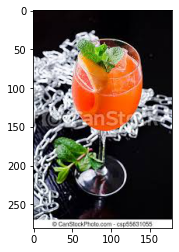

In [22]:
#testing the image to see if the prediction is accuate

img = mpimg.imread('data/manual test/manual1.jpeg')
imgplot = plt.imshow(img)
plt.show()

# Pulling top drink information
from the dataframe. Not sure how streamlit works maybe top3

In [49]:
ingredients = df.loc[df.cocktail == forwards[0]]['ingredients'].tolist()[0]

### Come Back to Format!

In [51]:
ingredients#.remove('')....have to see other examples, did not thoroughly check the api

"['Aperol', 'Prosecco', 'Soda Water', '', '', '', '']"

In [54]:
recipie = df.loc[df.cocktail == forwards[0]]['recipie'].tolist()

In [65]:
recipie[0]

'Put a couple of cubes of ice into 2 glasses and add a 50 ml measure of Aperol to each. Divide the prosecco between the glasses and then top up with soda, if you like.'

# Making this a Function then resuming Tests

In [68]:
def photo_tester(path):
    '''
    expands upon the pre-processing function, to pull all the infromation for the photo at once
    '''
    #pre-process
    img = image.load_img(path, target_size=(256, 256, 3))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    #display
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.show()
    
    backwards = model.predict(x).argsort()[0]
    forwards = []
    for items in backwards[-1::-1]:
        forwards.append(label_names[items])
        
    print('We believe it looks like like this!')
    print(forwards[0])
    
    ingredients = df.loc[df.cocktail == forwards[0]]['ingredients'].tolist()[0]
    print('The ingredients for this cocktail are:' + ingredients)
    
    recipie = df.loc[df.cocktail == forwards[0]]['recipie'].tolist()[0]
    print('And you make it like this!' + recipie)
    
    
    print('And if that\'s not it, it may be one of these:' + forwards[1] + forwards[2] )

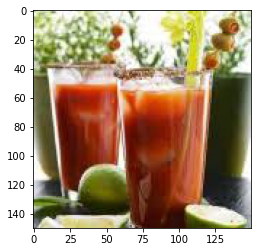

We believe it looks like like this!
Bloody Mary
The ingredients for this cocktail are:['Vodka', 'Tomato juice', 'Lemon juice', 'Worcestershire sauce', 'Tabasco sauce', 'Lime']
And you make it like this!Stirring gently, pour all ingredients into highball glass. Garnish.
And if that's not it, it may be one of these:Aperol SpritzMoscow Mule


In [69]:
photo_tester('data/Manual Test/manual2.jpeg')

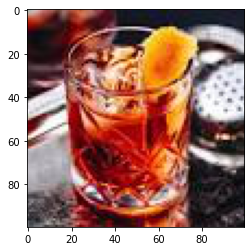

We believe it looks like like this!
Old Fashioned
The ingredients for this cocktail are:['Bourbon', 'Angostura bitters', 'Sugar', 'Water']
And you make it like this!Place sugar cube in old fashioned glass and saturate with bitters, add a dash of plain water. Muddle until dissolved.
Fill the glass with ice cubes and add whiskey.

Garnish with orange twist, and a cocktail cherry.
And if that's not it, it may be one of these:Aperol SpritzBloody Mary


In [70]:
photo_tester('data/manual test/manual3.jpeg')

In [73]:
for items in (path('data/test data')):
    print(items)

NameError: name 'path' is not defined